<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/lab6_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression

สมการเชิงเส้นที่มีตัวแปรอิสระ (x) มากกว่า 1 ตัว: y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ... + b<sub>n</sub>x<sub>n</sub>

### Step 1: การจัดเตรียมข้อมูล

สมการเชิงเส้นที่มีตัวแปรอิสระ (x) มากกว่า 1 ตัว: y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ... + b<sub>n</sub>x<sub>n</sub> ประกอบด้วย ข้อมูลเข้า (x) มากกว่า 1 คอลัมน์ (2 มิติ) และผลลัพธ์ (y)


In [1]:
import numpy as np

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x = np.array(x)
y = np.array(y)

### Step 2: Data Visualization

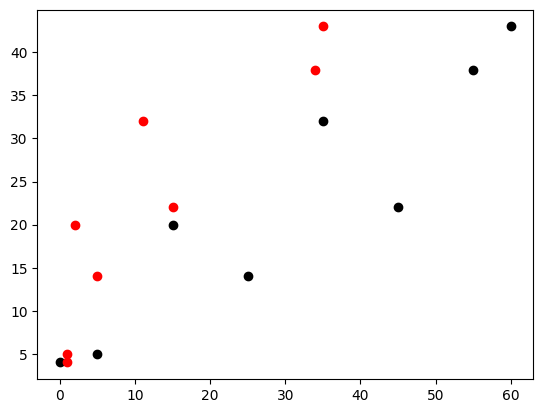

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x[:, 0], y, color='black')  # แสดงความจุด x1, y
plt.scatter(x[:, 1], y, color='red')    # แสดงความจุด x2, y

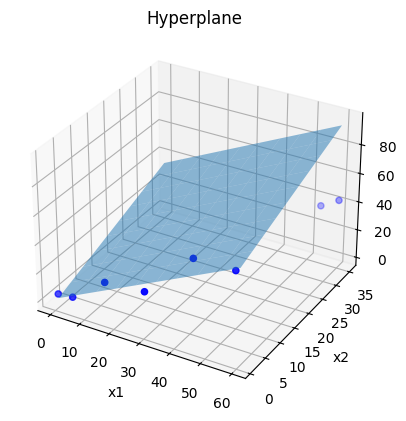

In [10]:
# prompt: plot graph hyper plane

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have already defined x and y from the previous code

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(x[:, 0], x[:, 1], y, color='blue')

# Generate hyperplane data (example hyperplane: y = x1 + x2)
x1_plane = np.linspace(min(x[:, 0]), max(x[:, 0]), 10)
x2_plane = np.linspace(min(x[:, 1]), max(x[:, 1]), 10)
x1_plane, x2_plane = np.meshgrid(x1_plane, x2_plane)
y_plane = x1_plane + x2_plane # Replace with your actual hyperplane equation

# Plot the hyperplane
ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Hyperplane')

# Show the plot
plt.show()

### Step 3: Import Packages and Classes

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression # LinearRegression

### Step 4: สร้างแบบจำลอง (Model) และทำการฝึกสอน (fit)

In [5]:
model = LinearRegression() # สร้างแบบจำลอง
model.fit(x, y) # ทำการฝึกสอน

LinearRegression()

### Step 5: การทำนายผลลัพธ์ (Prediction)

In [6]:
y_predict = model.predict(x) # ทำนายผลลัพธ์ y_predict เมื่อส่งค่า x ให้กับแบบจำลอง(model)
print(f'predicted response:\n{y_predict}')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


### Step 6: แสดงผลด้วยภาพ (Data Visualization)

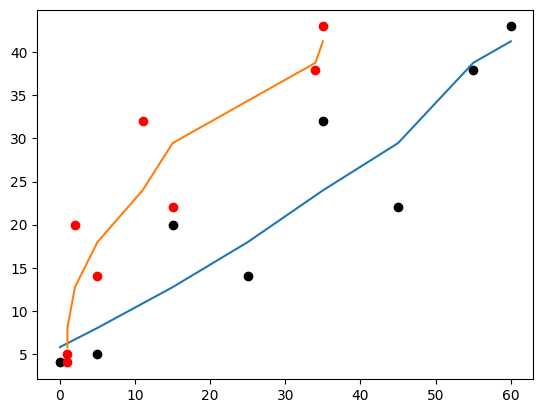

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x[:, 0], y, color='black')  # แสดงความจุด x1, y
plt.scatter(x[:, 1], y, color='red')    # แสดงความจุด x2, y

plt.plot(x[:, 0], y_predict)  # แสดงความจุด x1, y_predict
plt.plot(x[:, 1], y_predict)  # แสดงความจุด x2, y_predict
plt.show()

### Step 7: การวัดประสิทธิภาพของแบบจำลอง

In [9]:
r2 = model.score(x, y)  # x, y

print(f'coefficient of determination: {r2}')  # ค่า R2 ใช้เพื่อวัดประสิทธิภาพของแบบจำลอง เข้าใกล้ 1 แปลว่า การทำนายจะ Fit กับข้อมูลมาก

coefficient of determination: 0.8615939258756776


### Step 8: การนำแบบจำลองไปใช้ที่อื่น

เราสามารทำได้โโดย นำค่าสัมประสิทธิ์ (Coefficient) / ค่าน้ำหนัก (Weight) ของสมการเชิงเส้นที่แบบจำลองสร้างไว้ ไปใช้โดยไม่ต้องมี Python ได้

In [11]:
print(f'intercept: {model.intercept_}')       # ค่า model.intercept_ คือ ค่า coefficient ของ b0
print(f'slope:{model.coef_}')                 # ค่า model.coef_ คือ ค่า coefficient ของ b1 และ b2

intercept: 5.52257927519819
slope:[0.44706965 0.25502548]


In [12]:
# สามารถนำค่าสัมประสิทธิ์ intercept: 5.522 และ coefficient (slope): 0.447 และ 0.255
y_predict = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f'predicted response:\n{y_predict}')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


### Step 9: ทดสอบกับข้อมูลที่ไม่เคยเรียนรู้มาก่อน (Unknown)
ทำการสังเคราะห์ข้อมูลของคอลัมน์สำหรับ b1 และ b2

In [13]:
x_test = np.arange(10).reshape(-1, 2) # สร้างข้อมูลสังเคราะห์ขึ้นมาจำนวน 5 ตัว
x_test

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [14]:
y_test = model.predict(x_test)    # ทำนายค่า y_test จากข้อมูลที่สังเคราะห์
y_test

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])